# Import libraries

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path = "/content/drive/My Drive/M2_WASEDA/Macro1/Group_Assignments/Assignment1_Group1E/hayashi"

# Import dataset from PWT91 as an excel file

In [3]:
# Import PWT91 dataset
df = pd.read_excel(path+"/working_data/pwt91.xlsx", sheet_name="Data")
df["year"] = pd.to_datetime(df["year"], format='%Y')
df = df.set_index("year")

# Preprocessing

In [4]:
# Choose one country located in Asia
# For example, here I choose Malaysia
df = df[df.country=="Malaysia"]

In [5]:
# Change the names of variables
df = df.rename({"rgdpna": "Y", "rkna": "K", "emp": "L", "hc": "H"}, axis=1)

In [6]:
df.columns

Index(['countrycode', 'country', 'currency_unit', 'rgdpe', 'rgdpo', 'pop', 'L',
       'avh', 'H', 'ccon', 'cda', 'cgdpe', 'cgdpo', 'cn', 'ck', 'ctfp',
       'cwtfp', 'Y', 'rconna', 'rdana', 'rnna', 'K', 'rtfpna', 'rwtfpna',
       'labsh', 'irr', 'delta', 'xr', 'pl_con', 'pl_da', 'pl_gdpo', 'i_cig',
       'i_xm', 'i_xr', 'i_outlier', 'i_irr', 'cor_exp', 'statcap', 'csh_c',
       'csh_i', 'csh_g', 'csh_x', 'csh_m', 'csh_r', 'pl_c', 'pl_i', 'pl_g',
       'pl_x', 'pl_m', 'pl_n', 'pl_k'],
      dtype='object')

In [7]:
# Extract the variables related to this problem
df = df[["country", "Y", "K", "L", "H"]]

In [8]:
# Let alpha be 0.33
alpha = 0.33

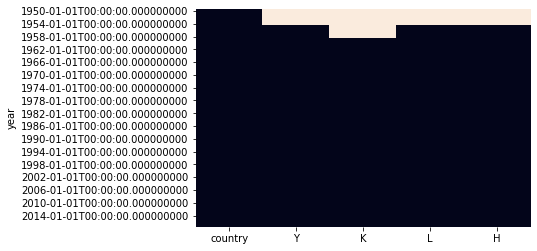

In [9]:
# See the data availability
sns.heatmap(df.isnull(), cbar=False)
df = df.dropna()

In [10]:
# Data Availability
display(df.head())
display(df.tail())

,country,Y,K,L,H
year,,,,,
1959-01-01,Malaysia,20450.025391,0.027131,2.607781,1.345449
1960-01-01,Malaysia,22026.121094,0.028197,2.659117,1.353592
1961-01-01,Malaysia,23630.435547,0.029409,2.729088,1.366992
1962-01-01,Malaysia,25080.068359,0.031064,2.800901,1.380525
1963-01-01,Malaysia,26742.832031,0.032772,2.874602,1.394192


,country,Y,K,L,H
year,,,,,
2013-01-01,Malaysia,632053.1250,1.109269,13.871958,2.947074
2014-01-01,Malaysia,670018.8125,1.163557,14.222030,2.968600
2015-01-01,Malaysia,704132.9375,1.216366,14.469134,2.990283
2016-01-01,Malaysia,733871.3125,1.268478,14.568936,3.012125
2017-01-01,Malaysia,777147.8125,1.328262,14.842992,3.034126


Data exists btw 1959 - 2017.

# See the plot and consider changing points

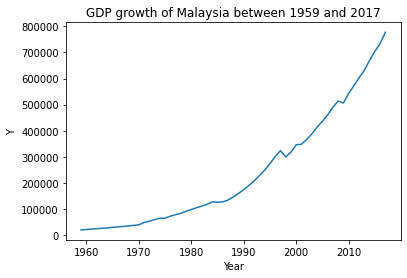

In [12]:
plt.plot(df.Y)
plt.ylabel("Y")
plt.xlabel("Year")
plt.title("GDP growth of Malaysia between 1959 and 2017")
plt.show()

There are three recessions in the history of Malaysia
https://crawford.anu.edu.au/acde/publications/publish/papers/wp2010/wp_econ_2010_12.pdf

So, I think 1986 and 1998 are good points to divide.

In [14]:
df_first = df["1959": "1986"]
df_second = df["1986": "1998"]
df_third = df["1998": "2017"]

# Calculation of Growth Accounting

In [26]:
def growth_accounting(df, human_capital=True):
  if human_capital:
    Y_Growth_Rate = (df.Y[-1]/df.Y[0])**(1/(len(df)-1)) - 1
    K_Growth_Rate = alpha * ((df.K[-1]/df.K[0])**(1/(len(df)-1)) - 1)
    H_Growth_Rate = (1-alpha) * ((df.H[-1]/df.H[0])**(1/(len(df)-1)) - 1)
    L_Growth_Rate = (1-alpha) * ((df.L[-1]/df.L[0])**(1/(len(df)-1)) - 1)
    A_Growth_Rate = Y_Growth_Rate - K_Growth_Rate - H_Growth_Rate - L_Growth_Rate
    
    print("GDP growth rate is: ", 100*Y_Growth_Rate, "%")
    print("Capital growth rate is: ", 100*K_Growth_Rate, "%")
    print("Human Capital growth rate is: ", 100*H_Growth_Rate, "%")
    print("Labor growth rate is: ", 100*L_Growth_Rate, "%")
    print("TFP growth rate is: ", 100*A_Growth_Rate, "%")
    
    labels = "Share of Capital Growth Rate", "Share of Human Capital Growth Rate", "Share of Labor Growth Rate", "Share of TFP Growth Rate"
    decomposition = [K_Growth_Rate/Y_Growth_Rate, H_Growth_Rate/Y_Growth_Rate, L_Growth_Rate/Y_Growth_Rate, A_Growth_Rate/Y_Growth_Rate]
    fig1,ax1 = plt.subplots()
    ax1.pie(decomposition, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
    ax1.axis("equal")
    plt.title("The share of each factor in the GDP growth")
    plt.show()
  
  else:
    Y_Growth_Rate = (df.Y[-1]/df.Y[0])**(1/(len(df)-1)) - 1
    K_Growth_Rate = alpha * ((df.K[-1]/df.K[0])**(1/(len(df)-1)) - 1)
    L_Growth_Rate = (1-alpha) * ((df.L[-1]/df.L[0])**(1/(len(df)-1)) - 1)
    A_Growth_Rate = Y_Growth_Rate - K_Growth_Rate - L_Growth_Rate
    
    print("GDP growth rate is: ", 100*Y_Growth_Rate, "%")
    print("Capital growth rate is: ", 100*K_Growth_Rate, "%")
    print("Labor growth rate is: ", 100*L_Growth_Rate, "%")
    print("TFP growth rate is: ", 100*A_Growth_Rate, "%")

    labels = "Share of Capital Growth Rate", "Share of Labor Growth Rate", "Share of TFP Growth Rate"
    decomposition = [K_Growth_Rate/Y_Growth_Rate, L_Growth_Rate/Y_Growth_Rate, A_Growth_Rate/Y_Growth_Rate]
    fig1,ax1 = plt.subplots()
    ax1.pie(decomposition, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
    ax1.axis("equal")
    plt.title("The share of each factor in the GDP growth")
    plt.show()

## Calculation for table 1

GDP growth rate is:  6.472658885455451 %
Capital growth rate is:  2.289760313679814 %
Labor growth rate is:  2.0392969767092004 %
TFP growth rate is:  2.1436015950664364 %


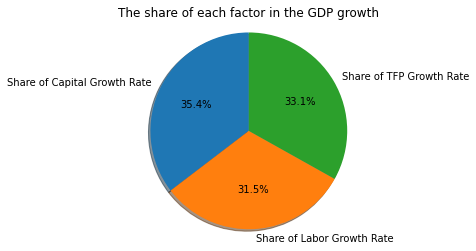

In [27]:
# All terms
growth_accounting(df, human_capital=False)

GDP growth rate is:  7.02177513154898 %
Capital growth rate is:  2.9831002325040727 %
Labor growth rate is:  2.0120740700726434 %
TFP growth rate is:  2.0266008289722635 %


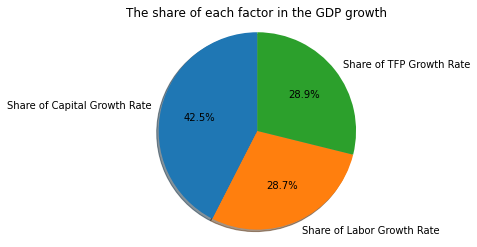

In [28]:
# 1959-1986
growth_accounting(df_first, human_capital=False)

GDP growth rate is:  7.367171872145062 %
Capital growth rate is:  2.303646578585115 %
Labor growth rate is:  2.3962696173656535 %
TFP growth rate is:  2.667255676194293 %


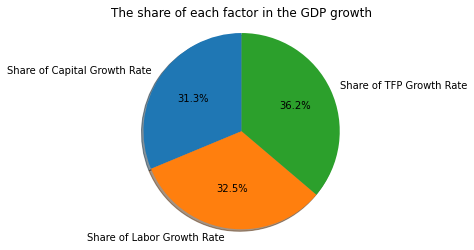

In [29]:
# 1986-1998
growth_accounting(df_second, human_capital=False)

GDP growth rate is:  5.140153892821497 %
Capital growth rate is:  1.3188785963622047 %
Labor growth rate is:  1.8533650719932075 %
TFP growth rate is:  1.9679102244660855 %


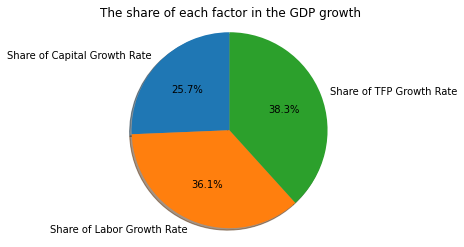

In [30]:
# 1998-2017
growth_accounting(df_third, human_capital=False)

It is clear that Malaysia has expanded its GDP with the rapid growth of TFP. The share of TFP growth rate in GDP growth rate has increased gradually. 

For example, education is one of the factors.
Actually, in these days, there are some universities which are highly assessed by World University Ranking or something.

*Table 1*

|                                                           |                    |   | Accounting for Economic Growth in Malaysia |   |                 |   |                                |
|-----------------------------------------------------------|--------------------|---|--------------------------------------------|---|-----------------|---|--------------------------------|
|                                                           |                    |   | Source of Growth                           |   |                 |   |                                |
| Years                                                     | Output Growth △Y/Y | = | Capital  α△K/K                             | + | Labor (1-α)△L/L | + | Total Factor Productivity △A/A |
|                                                           |                    |   | (Average Percentage Increase Per Year)     |   |                 |   |                                |
| 1959-2017                                                 | 6.5                 |   | 2.3                                       |   | 2.0             |   | 2.2                             |
| 1959-1986                                                 | 7.0                |   | 3.0                                        |   | 2.0             |   | 2.0                            |
| 1986-1998                                                 | 7.4                |   | 2.3                                        |   | 2.4             |   | 2.7                            |
| 1998-2017                                                 | 5.1                |   | 1.3                                        |   | 1.9             |   | 1.9                            |
| Source: https://www.rug.nl/ggdc/productivity/pwt/?lang=en |                    |   |                                            |   |                 |   |                                |

## Calculation for table 2

GDP growth rate is:  6.472658885455451 %
Capital growth rate is:  2.289760313679814 %
Human Capital growth rate is:  0.9459973362861983 %
Labor growth rate is:  2.0392969767092004 %
TFP growth rate is:  1.1976042587802376 %


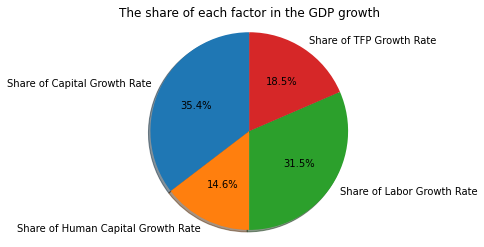

In [31]:
# All terms
growth_accounting(df, human_capital=True)

GDP growth rate is:  7.02177513154898 %
Capital growth rate is:  2.9831002325040727 %
Human Capital growth rate is:  1.024679742963583 %
Labor growth rate is:  2.0120740700726434 %
TFP growth rate is:  1.001921086008681 %


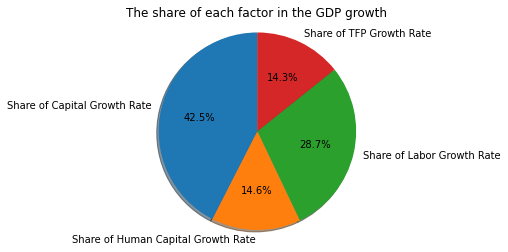

In [32]:
# 1959-1986
growth_accounting(df_first, human_capital=True)

GDP growth rate is:  7.367171872145062 %
Capital growth rate is:  2.303646578585115 %
Human Capital growth rate is:  1.2700983829887462 %
Labor growth rate is:  2.3962696173656535 %
TFP growth rate is:  1.3971572932055465 %


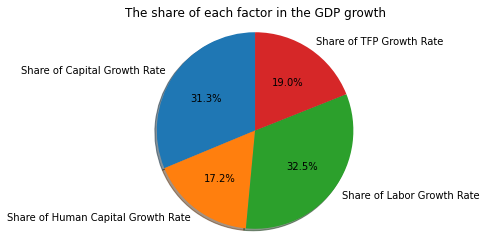

In [33]:
# 1986-1998
growth_accounting(df_second, human_capital=True)

GDP growth rate is:  5.140153892821497 %
Capital growth rate is:  1.3188785963622047 %
Human Capital growth rate is:  0.630774913159929 %
Labor growth rate is:  1.8533650719932075 %
TFP growth rate is:  1.3371353113061566 %


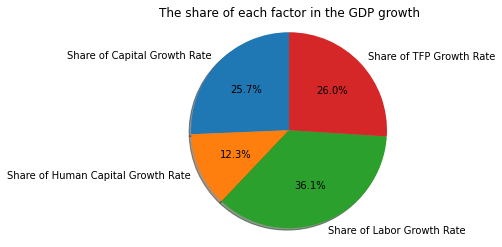

In [34]:
# 1998-2017
growth_accounting(df_third, human_capital=True)

*Table 2*

|                                                           |                    |   | Accounting for Economic Growth in Malaysia |   |                         |   |                 |   |                                |
|-----------------------------------------------------------|--------------------|---|--------------------------------------------|---|-------------------------|---|-----------------|---|--------------------------------|
|                                                           |                    |   | Source of Growth                           |   |                         |   |                 |   |                                |
| Years                                                     | Output Growth △Y/Y | = | Capital  α△K/K                             | + | Human Capital (1-α)△H/H | + | Labor (1-α)△L/L | + | Total Factor Productivity △A/A |
|                                                           |                    |   | (Average Percentage Increase Per Year)     |   |                         |   |                 |   |                                |
| 1959-2017                                                 | 6.5                 |   | 2.3                                       |   | 1.0                     |   | 2.0             |   | 1.2                           |
| 1959-1986                                                 | 7.0                |   | 3.0                                        |   | 1.0                     |   | 2.0             |   | 1.0                            |
| 1986-1998                                                 | 7.4                |   | 2.3                                        |   | 1.3                     |   | 2.4             |   | 1.4                            |
| 1998-2017                                                 | 5.1                |   | 1.3                                        |   | 0.6                     |   | 1.9             |   | 1.3                            |
| Source: https://www.rug.nl/ggdc/productivity/pwt/?lang=en |                    |   |                                            |   |                         |   |                 |   |                                |

## Discussion

Table 2:
$$
\Delta Y_t / Y_t = \alpha \Delta K_t / K_t + (1-\alpha) \Delta H_t / H_t + (1-\alpha) \Delta L_t / L_t + \Delta A_t / A_t
$$

# The most important factors in the GDP growth of Malaysia

In [23]:
df_first

,country,Y,K,L,H
year,,,,,
1959-01-01,Malaysia,20450.025391,0.027131,2.607781,1.345449
1960-01-01,Malaysia,22026.121094,0.028197,2.659117,1.353592
1961-01-01,Malaysia,23630.435547,0.029409,2.729088,1.366992
1962-01-01,Malaysia,25080.068359,0.031064,2.800901,1.380525
1963-01-01,Malaysia,26742.832031,0.032772,2.874602,1.394192
1964-01-01,Malaysia,28078.792969,0.034481,2.950243,1.407994
1965-01-01,Malaysia,30150.220703,0.036468,3.027874,1.421933
1966-01-01,Malaysia,32308.878906,0.038599,3.107549,1.436935
1967-01-01,Malaysia,33428.980469,0.040796,3.189320,1.452096


In [38]:
df_ts = pd.DataFrame({"Period": ["1959-1986", "1986-1998", "1998-2017"], "TFP": [0.143, 0.19, 0.26], "Labor": [0.287, 0.325, 0.361], "Capital": [0.425, 0.313, 0.257], 
                      "Human Capital": [0.146, 0.172, 0.123]})

In [39]:
df_ts

,Period,TFP,Labor,Capital,Human Capital
0,1959-1986,0.143,0.287,0.425,0.146
1,1986-1998,0.190,0.325,0.313,0.172
2,1998-2017,0.260,0.361,0.257,0.123


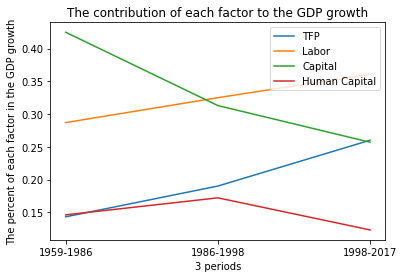

In [46]:
plt.plot(df_ts["Period"], df_ts["TFP"], label="TFP")
plt.plot(df_ts["Period"], df_ts["Labor"], label="Labor")
plt.plot(df_ts["Period"], df_ts["Capital"], label="Capital")
plt.plot(df_ts["Period"], df_ts["Human Capital"], label="Human Capital")
plt.ylabel("The percent of each factor in the GDP growth")
plt.xlabel("3 periods")
plt.title("The contribution of each factor to the GDP growth")
plt.legend()
plt.show()